# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm
from itertools import product

In [3]:
from src.visualizer import plot_clasp, plot_clasp_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
cost = "l1"
thresholds = np.round(np.arange(.05, 1., .05), 2)

methods = list()

for t in thresholds:
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,l1-cost-0.05-threshold,l1-cost-0.1-threshold,l1-cost-0.15-threshold,l1-cost-0.2-threshold,l1-cost-0.25-threshold,l1-cost-0.3-threshold,l1-cost-0.35-threshold,l1-cost-0.4-threshold,l1-cost-0.45-threshold,l1-cost-0.5-threshold,l1-cost-0.55-threshold,l1-cost-0.6-threshold,l1-cost-0.65-threshold,l1-cost-0.7-threshold,l1-cost-0.75-threshold,l1-cost-0.8-threshold,l1-cost-0.85-threshold,l1-cost-0.9-threshold,l1-cost-0.95-threshold
0,DodgerLoopDay,0.046,0.050,0.049,0.063,0.062,0.062,0.061,0.060,0.060,0.059,0.059,0.058,0.058,0.056,0.085,0.124,0.123,0.123,0.252
1,EEGRat,0.370,0.579,0.564,0.558,0.607,0.722,0.724,0.726,0.729,0.731,0.599,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
2,EEGRat2,0.478,0.569,0.567,0.557,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.496,0.504,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281
4,GrandMalSeizures2,0.013,0.014,0.018,0.020,0.022,0.023,0.027,0.026,0.032,0.032,0.033,0.037,0.042,0.042,0.046,0.050,0.057,0.057,0.058
5,GreatBarbet1,0.906,0.604,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,0.026,0.026,0.032,0.052,0.077,0.129,0.401,0.554,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.076,0.093,0.114,0.139,0.149,0.160,0.163,0.192,0.259,0.276,0.279,0.421,0.421,0.564,0.557,0.553,0.530,0.358,0.358
8,InsectEPG1,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_955/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


l1-cost-0.05-threshold    0.249
l1-cost-0.1-threshold     0.271
l1-cost-0.15-threshold    0.295
l1-cost-0.2-threshold     0.335
l1-cost-0.25-threshold    0.337
l1-cost-0.3-threshold     0.345
l1-cost-0.35-threshold    0.347
l1-cost-0.4-threshold     0.360
l1-cost-0.45-threshold    0.386
l1-cost-0.5-threshold     0.380
l1-cost-0.55-threshold    0.381
l1-cost-0.6-threshold     0.383
l1-cost-0.65-threshold    0.390
l1-cost-0.7-threshold     0.397
l1-cost-0.75-threshold    0.398
l1-cost-0.8-threshold     0.399
l1-cost-0.85-threshold    0.402
l1-cost-0.9-threshold     0.395
l1-cost-0.95-threshold    0.402
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_955/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


l1-cost-0.05-threshold    0.229
l1-cost-0.1-threshold     0.208
l1-cost-0.15-threshold    0.207
l1-cost-0.2-threshold     0.225
l1-cost-0.25-threshold    0.226
l1-cost-0.3-threshold     0.230
l1-cost-0.35-threshold    0.212
l1-cost-0.4-threshold     0.216
l1-cost-0.45-threshold    0.253
l1-cost-0.5-threshold     0.255
l1-cost-0.55-threshold    0.253
l1-cost-0.6-threshold     0.249
l1-cost-0.65-threshold    0.257
l1-cost-0.7-threshold     0.260
l1-cost-0.75-threshold    0.258
l1-cost-0.8-threshold     0.255
l1-cost-0.85-threshold    0.258
l1-cost-0.9-threshold     0.256
l1-cost-0.95-threshold    0.250
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

l1-cost-0.05-threshold:wins=7 rank=11.28571
l1-cost-0.1-threshold:wins=8 rank=9.71429
l1-cost-0.15-threshold:wins=7 rank=8.42857
l1-cost-0.2-threshold:wins=10 rank=5.7619
l1-cost-0.25-threshold:wins=9 rank=5.2381
l1-cost-0.3-threshold:wins=9 rank=5.09524
l1-cost-0.35-threshold:wins=8 rank=5.19048
l1-cost-0.4-threshold:wins=9 rank=4.42857
l1-cost-0.45-threshold:wins=9 rank=3.61905
l1-cost-0.5-threshold:wins=10 rank=4.04762
l1-cost-0.55-threshold:wins=9 rank=4.2381
l1-cost-0.6-threshold:wins=9 rank=4.38095
l1-cost-0.65-threshold:wins=9 rank=4.19048
l1-cost-0.7-threshold:wins=10 rank=4.04762
l1-cost-0.75-threshold:wins=9 rank=3.57143
l1-cost-0.8-threshold:wins=9 rank=3.52381
l1-cost-0.85-threshold:wins=10 rank=3.14286
l1-cost-0.9-threshold:wins=10 rank=3.19048
l1-cost-0.95-threshold:wins=12 rank=3.2381


Let's plot and output the ranks.

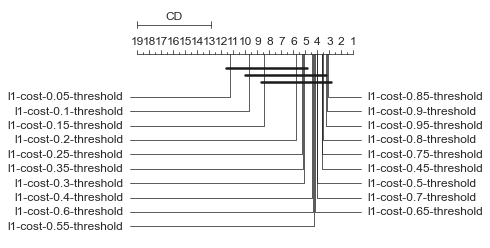

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5, filename=f"../../figures/cd_ablation_window_{cost}_threshold.pdf")

Let's compute wins/losses against ClaSP.

In [11]:
selection = "l1-cost-0.85-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

l1-cost-0.85-threshold vs l1-cost-0.05-threshold: (wins/ties/losses): 12/6/3
l1-cost-0.85-threshold vs l1-cost-0.1-threshold: (wins/ties/losses): 10/6/5
l1-cost-0.85-threshold vs l1-cost-0.15-threshold: (wins/ties/losses): 8/9/4
l1-cost-0.85-threshold vs l1-cost-0.2-threshold: (wins/ties/losses): 6/10/5
l1-cost-0.85-threshold vs l1-cost-0.25-threshold: (wins/ties/losses): 6/12/3
l1-cost-0.85-threshold vs l1-cost-0.3-threshold: (wins/ties/losses): 6/12/3
l1-cost-0.85-threshold vs l1-cost-0.35-threshold: (wins/ties/losses): 6/13/2
l1-cost-0.85-threshold vs l1-cost-0.4-threshold: (wins/ties/losses): 5/13/3
l1-cost-0.85-threshold vs l1-cost-0.45-threshold: (wins/ties/losses): 4/14/3
l1-cost-0.85-threshold vs l1-cost-0.5-threshold: (wins/ties/losses): 5/14/2
l1-cost-0.85-threshold vs l1-cost-0.55-threshold: (wins/ties/losses): 5/14/2
l1-cost-0.85-threshold vs l1-cost-0.6-threshold: (wins/ties/losses): 5/15/1
l1-cost-0.85-threshold vs l1-cost-0.65-threshold: (wins/ties/losses): 5/15/1
l1-cos

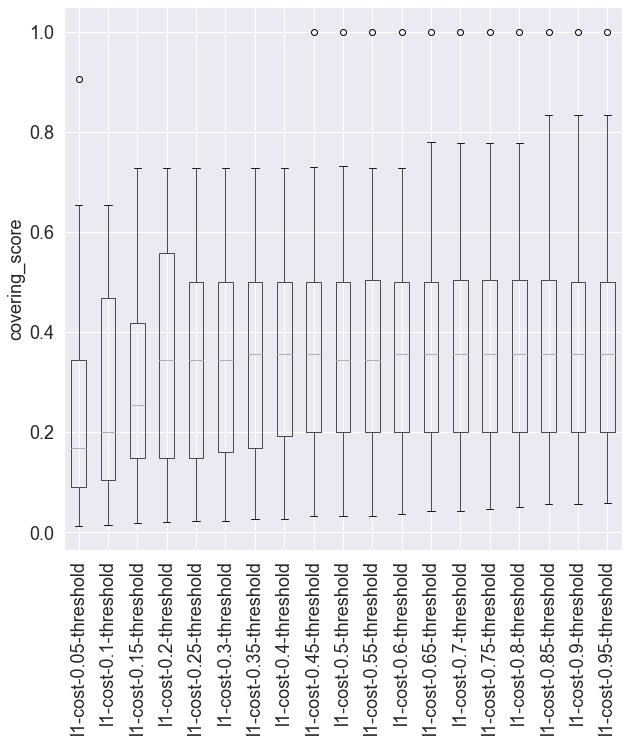

In [12]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig(f"../../figures/bp_ablation_window_{cost}_threshold.pdf", bbox_inches="tight") 